In [1]:
# Import the pandas library as pd
import pandas as pd

In [50]:
# Read the csv file using the read_csv() method to a new Dataframe
df = pd.read_csv("../examples/temperatures.csv")

# Show the first five entries using the head() method
df.head()

day  temperature
0  20170101          0.5
1  20170102          3.0
2  20170103          5.0
3  20170104          5.8
4  20170105          0.0

In [3]:
# Use the describe() method to show general statistics about the temperature
df["temperature"].describe()

count    365.000000
mean      10.965753
std        6.034407
min       -3.800000
25%        6.600000
50%       10.900000
75%       16.100000
max       23.600000
Name: temperature, dtype: float64

In [10]:
# Show all days where the temperature was above 22 degrees
df[df["temperature"] > 22]

day  temperature
136  20170517         22.3
146  20170527         22.9
169  20170619         23.6
172  20170622         22.9
199  20170719         23.5

In [7]:
# Show all days where the temperature was below -3 degrees
df[df["temperature"] < -3]

day  temperature
16  20170117         -3.4
17  20170118         -3.8

In [29]:
# Add a new column called freezing with a boolean indicating whether the temperature is < 0
df["freezing"] = df["temperature"] < 0
df.head(n = 10)

day  temperature                          date  freezing
0  20170101          0.5 1970-01-01 00:00:00.020170101     False
1  20170102          3.0 1970-01-01 00:00:00.020170102     False
2  20170103          5.0 1970-01-01 00:00:00.020170103     False
3  20170104          5.8 1970-01-01 00:00:00.020170104     False
4  20170105          0.0 1970-01-01 00:00:00.020170105     False
5  20170106         -3.0 1970-01-01 00:00:00.020170106      True
6  20170107         -0.2 1970-01-01 00:00:00.020170107      True
7  20170108          4.3 1970-01-01 00:00:00.020170108     False
8  20170109          4.8 1970-01-01 00:00:00.020170109     False
9  20170110          5.3 1970-01-01 00:00:00.020170110     False

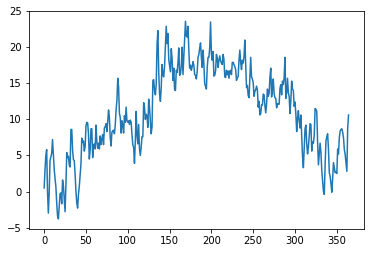

In [30]:
# Use plot() to show a line chart of the temperature
df["temperature"].plot()

In [51]:
df["date"] = pd.to_datetime(df["day"], format = "%Y%m%d")
del df["day"]

In [97]:
df["ts"] = pd.DatetimeIndex(df["date"])
df = df.set_index("ts")
df["month"] = df.resample("M").values
df

AttributeError: 'DatetimeIndexResampler' object has no attribute 'values'

In [84]:
df.set_index("date")
start = df["date"].iloc[0]
end = df["date"].iloc[-1]
df["timestamp"] = pd.date_range(start, end)
df.resample("M")

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'